In [9]:
%matplotlib inline

In [12]:
'''
Gather Futures Commitment of Traders data and perform sentiment analysis using a methodology
similar to what Larry Williams uses in his book: Trade Stocks and Commodities with the Insiders.

Explore Gold, Silver and Copper

'''
import pandas as pd
import Quandl as quandl

import matplotlib.pyplot as plt
import seaborn as sns



/home/tom/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# Gather Data
goldCOT_df = quandl.get('CFTC/GC_FO_ALL')
goldprice_df = quandl.get('CHRIS/CME_GC1', start_date="2006-06-01")

'''
goldCOT_df columns:

Index([u'Open Interest', u'Producer/Merchant/Processor/User Longs',
       u'Producer/Merchant/Processor/User Shorts', u'Swap Dealer Longs',
       u'Swap Dealer Shorts', u'Swap Dealer Spreads', u'Money Manager Longs',
       u'Money Manager Shorts', u'Money Manager Spreads',
       u'Other Reportable Longs', u'Other Reportable Shorts',
       u'Other Reportable Spreads', u'Total Reportable Longs',
       u'Total Reportable Shorts', u'Non Reportable Longs',
       u'Non Reportable Shorts'],
      dtype='object')
'''

# Drop unwanted fields
goldprice_df = goldprice_df.drop(['Open','High','Low','Change','Settle','Volume','Open Interest'], axis=1)

# Combine datasets
goldCOT_df = pd.concat([goldCOT_df, goldprice_df], axis=1, join_axes=[goldCOT_df.index])
del goldprice_df

# Fix missing price data by inerpolating between data points using timeseries
goldCOT_df['Last'] = goldCOT_df['Last'].interpolate(method='time')




In [3]:
'''
Create a number of new feature types:
(1) Open Interest Index
(2) Commercial Position Index
(3) Small Trader Position Index
(4) Commerical / OI Index
(5) Trends: Price Up & OI Up (True / False)
(6) Trends: Price Up & OI Down (True / False)
(7) Trends: Price Down & OI Up (True / False)
(8) Trends: Price Down & OI Down (True / False)

'''

# Lookback Windows
lookback1 = 26
lookback2 = 52




In [4]:
'''
Open Interest Index
Normalized form of OI to determine if there is enthusiasm in the market.
High value may indicate over enthusiasm

OI Index = ((OI(recent) - OI(rollingmin)) / (OI(rollingmax) - OI(rollingmin))) * 100
'''

lb_window = goldCOT_df['Open Interest'].rolling(window = lookback1)
goldCOT_df['OIIndex1'] = ((goldCOT_df['Open Interest'] - lb_window.min()) / (lb_window.max() - lb_window.min())) * 100

lb_window = goldCOT_df['Open Interest'].rolling(window = lookback2)
goldCOT_df['OIIndex2'] = ((goldCOT_df['Open Interest'] - lb_window.min()) / (lb_window.max() - lb_window.min())) * 100




In [5]:
'''
Commercial Position Index
Normalized form of Commercial Position to determine what 'pros' are doing

CP = net commercial position
CP Index = ((CP(recent) - CP(rollingmin)) / (CP(rollingmax) - CP(rollingmin)) * 100
'''

goldCOT_df["netCP"] = goldCOT_df["Producer/Merchant/Processor/User Longs"] - goldCOT_df["Producer/Merchant/Processor/User Shorts"]

lb_window = goldCOT_df['netCP'].rolling(window = lookback1)
goldCOT_df['CPIndex1'] = ((goldCOT_df['netCP'] - lb_window.min()) / (lb_window.max() - lb_window.min())) * 100

lb_window = goldCOT_df['netCP'].rolling(window = lookback2)
goldCOT_df['CPIndex2'] = ((goldCOT_df['netCP'] - lb_window.min()) / (lb_window.max() - lb_window.min())) * 100




In [6]:
'''
Small Trader Position Index
Normalized form of Small Trader Position to determine what 'joe public' is doing

ST = net small trader position
ST Index = ((ST(recent) - ST(rollingmin)) / (ST(rollingmax) - ST(rollingmin)) * 100
'''

goldCOT_df["netST"] = goldCOT_df["Non Reportable Longs"] - goldCOT_df["Non Reportable Shorts"]

lb_window = goldCOT_df['netST'].rolling(window = lookback1)
goldCOT_df['STIndex1'] = ((goldCOT_df['netST'] - lb_window.min()) / (lb_window.max() - lb_window.min())) * 100

lb_window = goldCOT_df['netST'].rolling(window = lookback2)
goldCOT_df['STIndex2'] = ((goldCOT_df['netST'] - lb_window.min()) / (lb_window.max() - lb_window.min())) * 100





In [31]:
'''
Commercial Position as a Percentage of OI Index
Normalized form of Commercial Position relative to OI to determine what 'pros' are doing


CP% = CP Index / OI
CP% Index = ((CP%(recent) - CP%(rollingmin)) / (CP%(rollingmax) - CP%(rollingmin)) * 100
'''
goldCOT_df["CPPercent"] = goldCOT_df["netCP"] / goldCOT_df["Open Interest"]

lb_window = goldCOT_df['CPPercent'].rolling(window = lookback1)
goldCOT_df['CPPercentIndex1'] = ((goldCOT_df['CPPercent'] - lb_window.min()) / (lb_window.max() - lb_window.min())) * 100

lb_window = goldCOT_df['CPPercent'].rolling(window = lookback2)
goldCOT_df['CPPercentIndex2'] = ((goldCOT_df['CPPercent'] - lb_window.min()) / (lb_window.max() - lb_window.min())) * 100




In [42]:
goldCOT_df.head()

,Open Interest,Producer/Merchant/Processor/User Longs,Producer/Merchant/Processor/User Shorts,Swap Dealer Longs,Swap Dealer Shorts,Swap Dealer Spreads,Money Manager Longs,Money Manager Shorts,Money Manager Spreads,Other Reportable Longs,...,OIIndex2,netCP,CPIndex1,CPIndex2,netST,STIndex1,STIndex2,CPPercent,CPPercentIndex1,CPPercentIndex2
Date,,,,,,,,,,,,,,,,,,,,,
2006-06-13,382474.0,42587.0,128892.0,19370.0,66611.0,22998.0,103211.0,30916.0,46704.0,33230.0,...,NaN,-86305.0,NaN,NaN,38677.0,NaN,NaN,-0.225649,NaN,NaN
2006-06-20,390281.0,47440.0,126992.0,22404.0,64682.0,25806.0,94632.0,30963.0,48730.0,32947.0,...,NaN,-79552.0,NaN,NaN,36357.0,NaN,NaN,-0.203833,NaN,NaN
2006-06-27,384321.0,48449.0,121890.0,22425.0,62640.0,25151.0,91042.0,32287.0,49614.0,31307.0,...,NaN,-73441.0,NaN,NaN,34980.0,NaN,NaN,-0.191093,NaN,NaN
2006-07-03,392868.0,48087.0,122568.0,22720.0,69714.0,26352.0,92545.0,30452.0,50821.0,32874.0,...,NaN,-74481.0,NaN,NaN,35184.0,NaN,NaN,-0.189583,NaN,NaN
2006-07-11,427008.0,54509.0,130618.0,21840.0,79217.0,28805.0,104213.0,27624.0,54922.0,33165.0,...,NaN,-76109.0,NaN,NaN,34926.0,NaN,NaN,-0.178238,NaN,NaN


In [45]:
goldCOT_df = goldCOT_df.dropna()


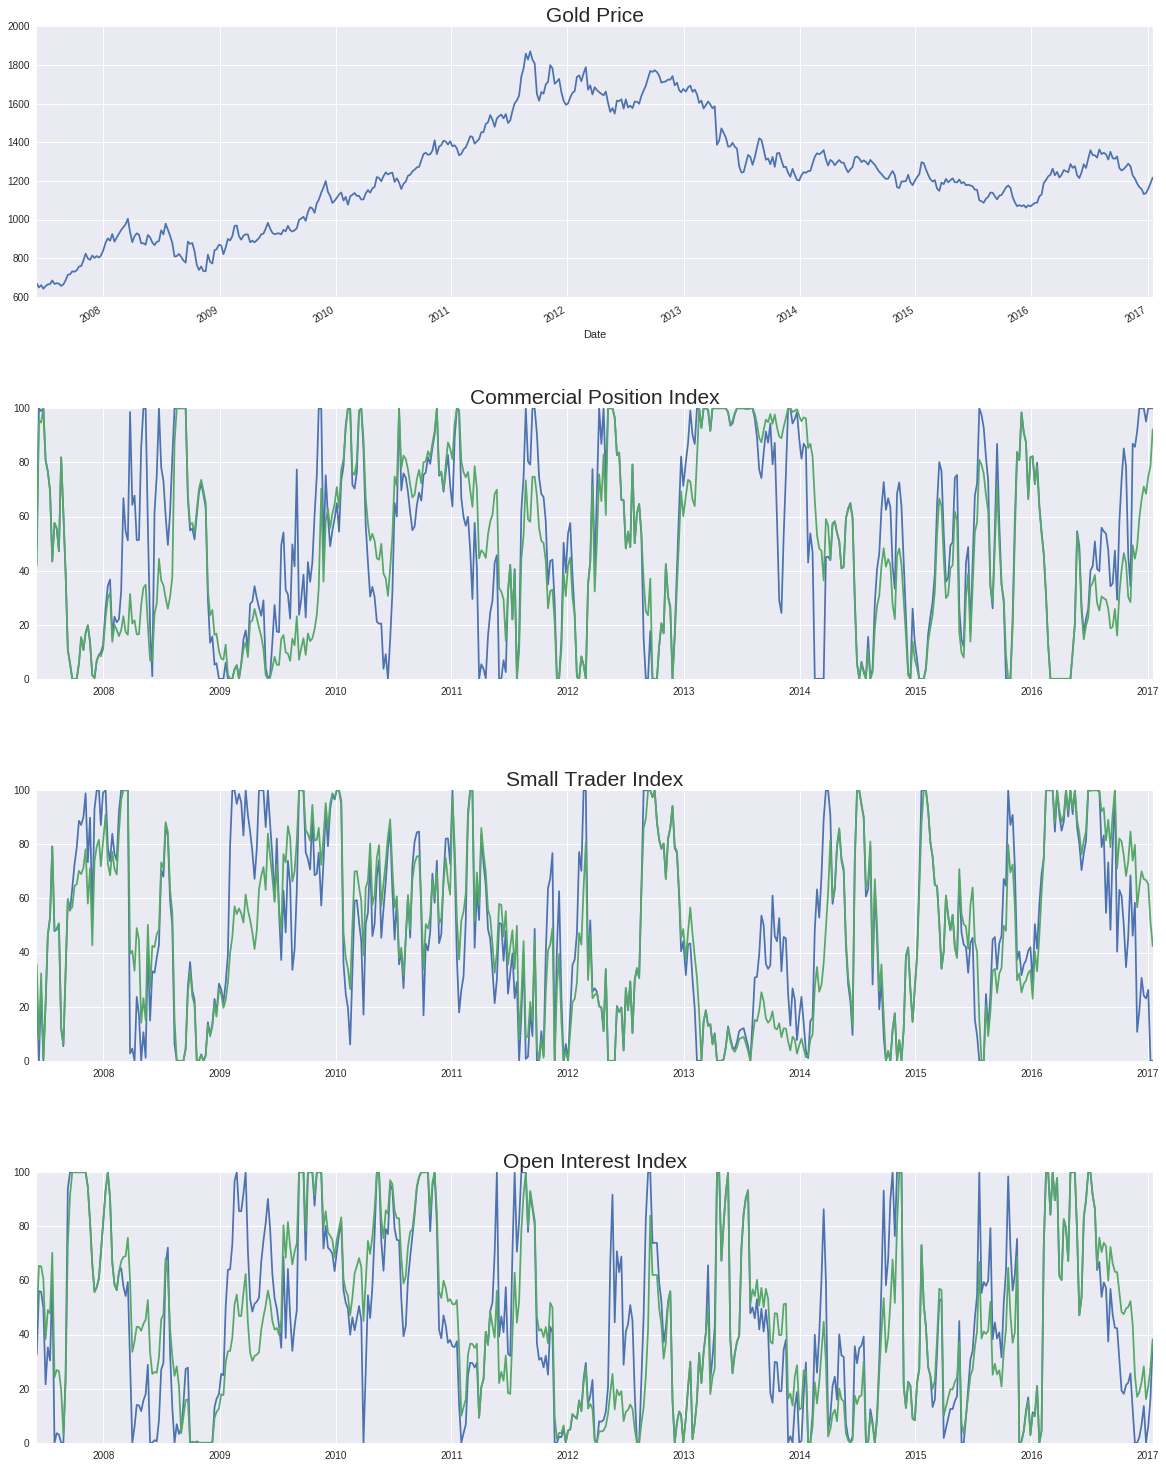

In [49]:
fig = plt.figure(figsize=(20,30))
#Price Plot
ax1 = plt.subplot2grid((16,3), (0,0), rowspan=3, colspan=3)
goldCOT_df.Last.plot(ax=ax1, label = 'Gold Price')
ax1.set_title('Gold Price', size = 21)

#Commerical Percentage of OI Plot
ax2 = plt.subplot2grid((16,3), (4,0), rowspan=3, colspan=3)
cpp1_line, = ax2.plot(goldCOT_df.CPPercentIndex1, label = "CPP26")
cpp2_line, = ax2.plot(goldCOT_df.CPPercentIndex2, label = "CPP52")
ax2.set_title('Commercial Position Index', size = 21)

#Small Trader Index Plot
ax3 = plt.subplot2grid((16,3), (8,0), rowspan=3, colspan=3)
st1_line, = ax3.plot(goldCOT_df.STIndex1, label = "ST26")
st2_line, = ax3.plot(goldCOT_df.STIndex2, label = "ST52")
ax3.set_title('Small Trader Index', size = 21)

#Open Interest Index Plot
ax4 = plt.subplot2grid((16,3), (12,0), rowspan=3, colspan=3)
oi1_line, = ax4.plot(goldCOT_df.OIIndex1, label = "OI26")
oi2_line, = ax4.plot(goldCOT_df.OIIndex2, label = "OI52")
ax4.set_title('Open Interest Index', size = 21)
